In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [45]:
covid = pd.read_csv('covid-data.csv')
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [46]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [47]:
covid.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [48]:
covid['IS_DEAD'] = covid.DATE_DIED.apply(lambda x: 0 if x == '9999-99-99' else 1)
covid.IS_DEAD.value_counts()

0    971633
1     76942
Name: IS_DEAD, dtype: int64

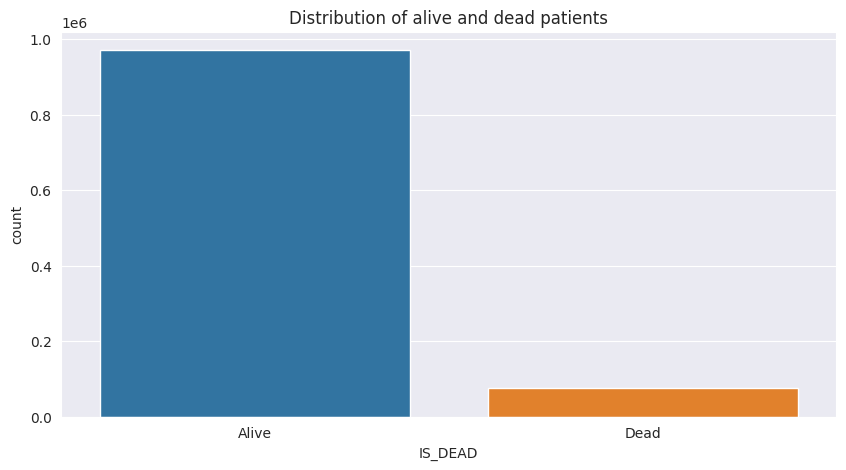

In [49]:
dead = covid.groupby('IS_DEAD').size().reset_index(name='count')
plt.figure(figsize=(10, 5))
sns.barplot(x='IS_DEAD', y='count', data=dead)
plt.title('Distribution of alive and dead patients')
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.show()


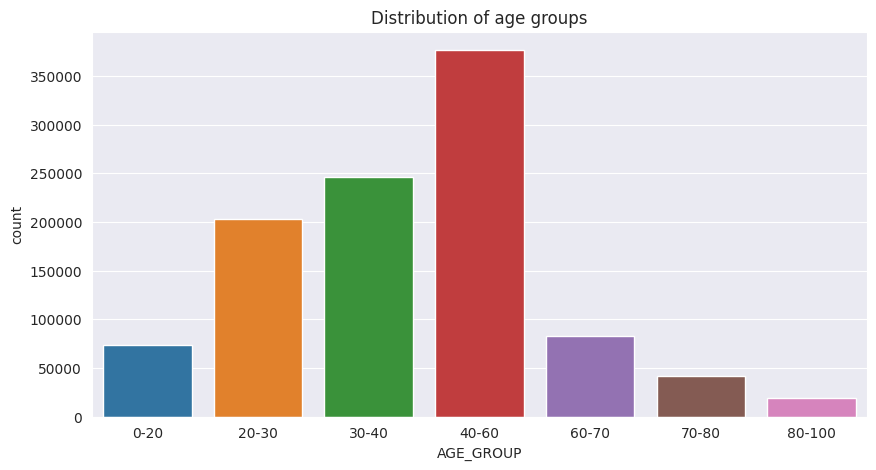

In [50]:
covid['AGE_GROUP'] = pd.cut(covid.AGE, bins=[0, 20, 30, 40 ,60 ,70, 80, 100],
                            labels=['0-20', '20-30', '30-40', '40-60', '60-70',
                                    '70-80', '80-100'])
plt.figure(figsize=(10, 5))
sns.countplot(x='AGE_GROUP', data=covid)
plt.title('Distribution of age groups')
plt.show()

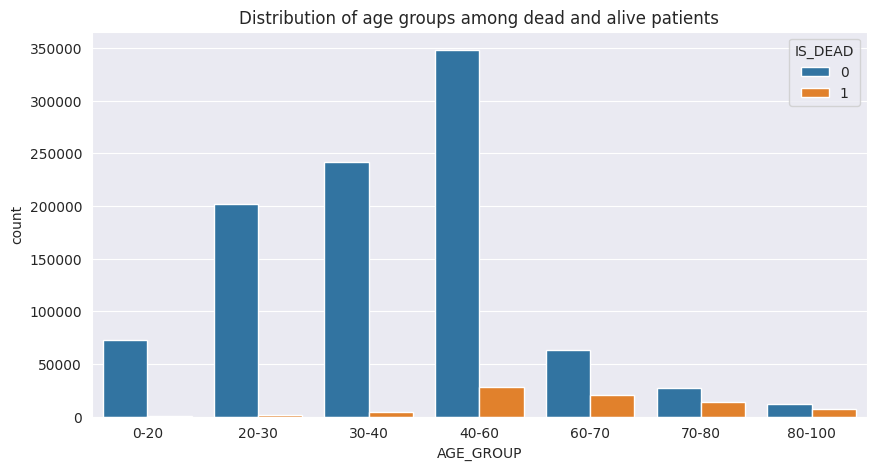

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(x='AGE_GROUP', hue='IS_DEAD', data=covid)
plt.title('Distribution of age groups among dead and alive patients')
plt.show()


In [53]:
for col in covid.columns:
    if col not in ['DATE_DIED', 'IS_DEAD', 'AGE_GROUP']:
        covid[col] = covid[col].apply(lambda x: 1 if x == 1 else 0)


covid.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,IS_DEAD,AGE_GROUP
0,0,1,1,1,03/05/2020,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,60-70
1,0,1,0,1,03/06/2020,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,70-80
2,0,1,0,0,09/06/2020,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,40-60
3,0,1,1,1,12/06/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,40-60
4,0,1,0,1,21/06/2020,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,60-70


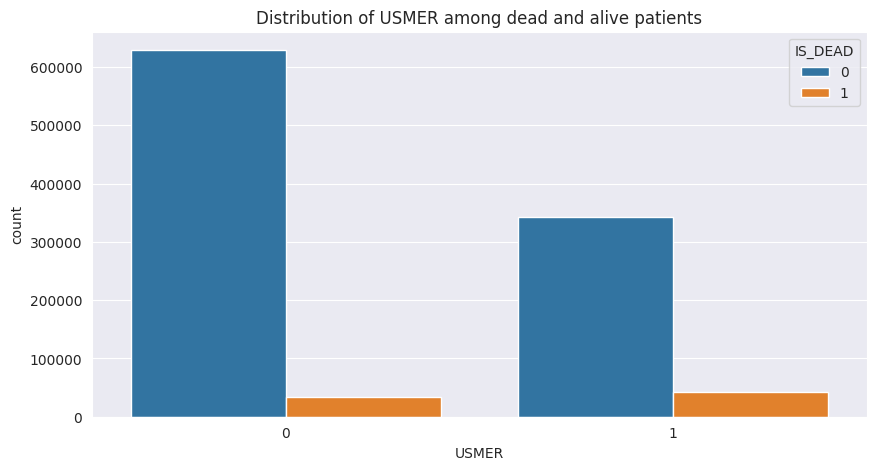

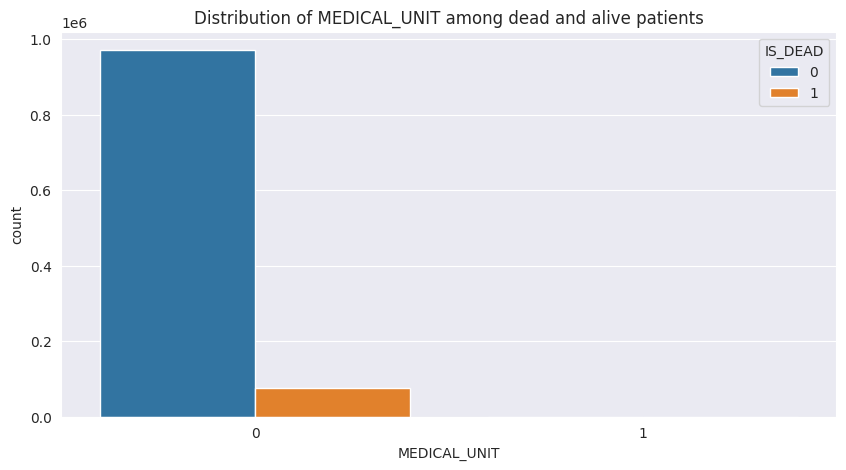

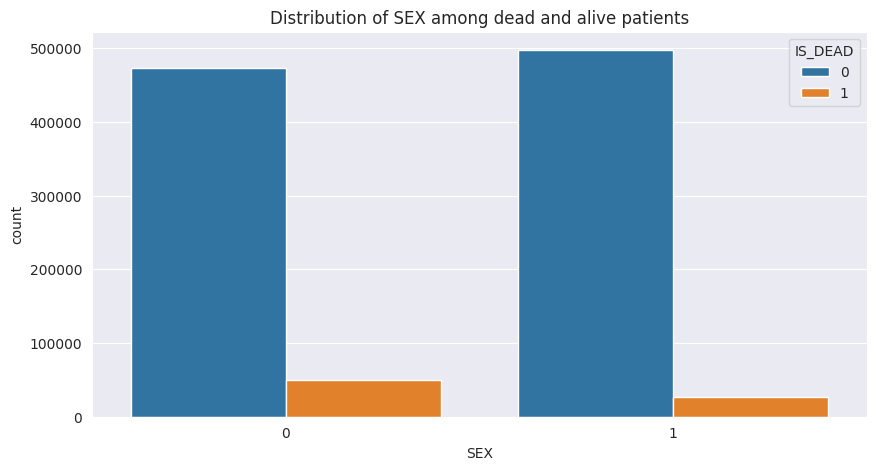

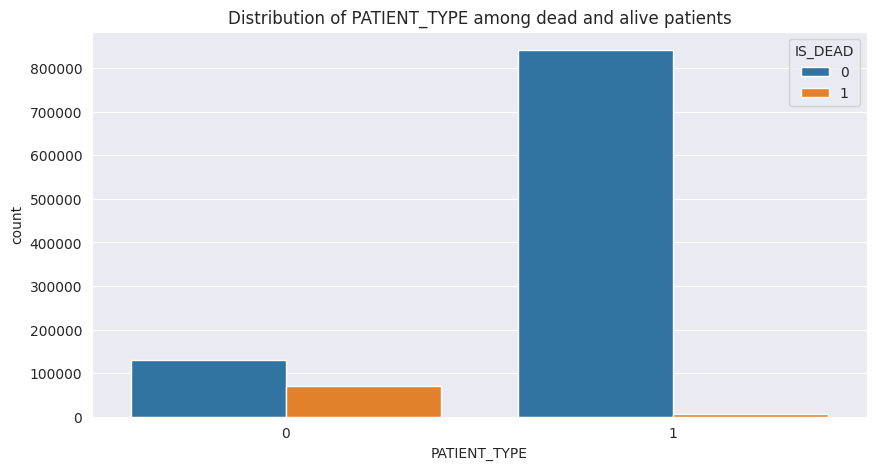

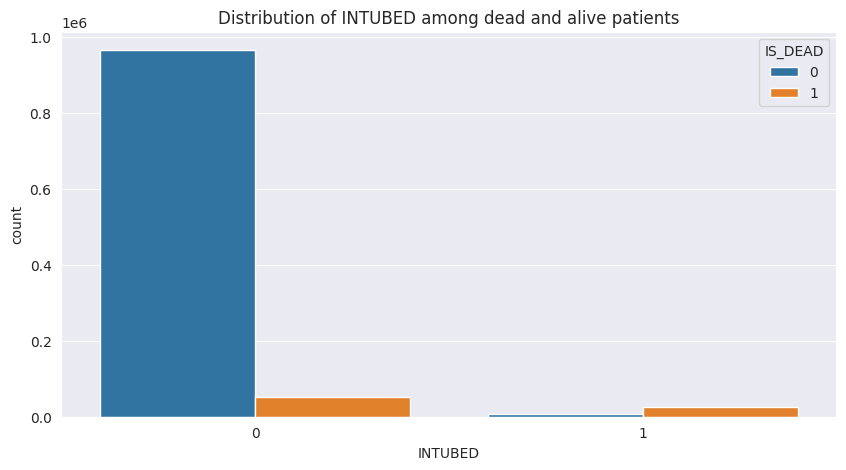

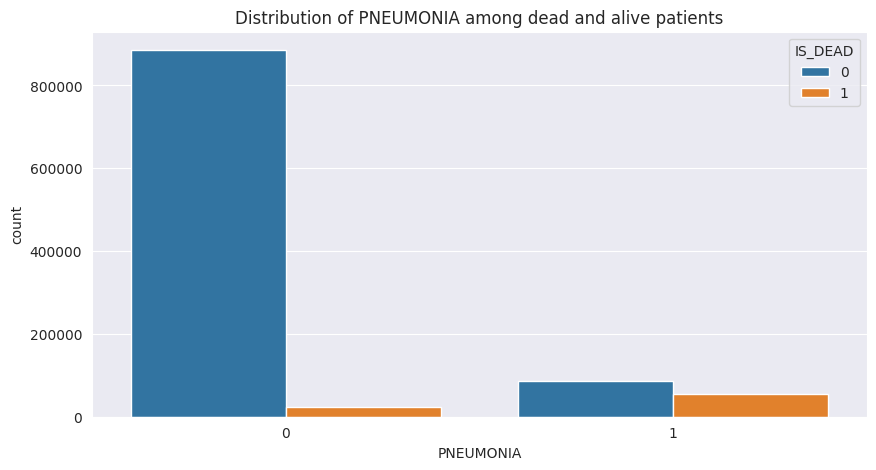

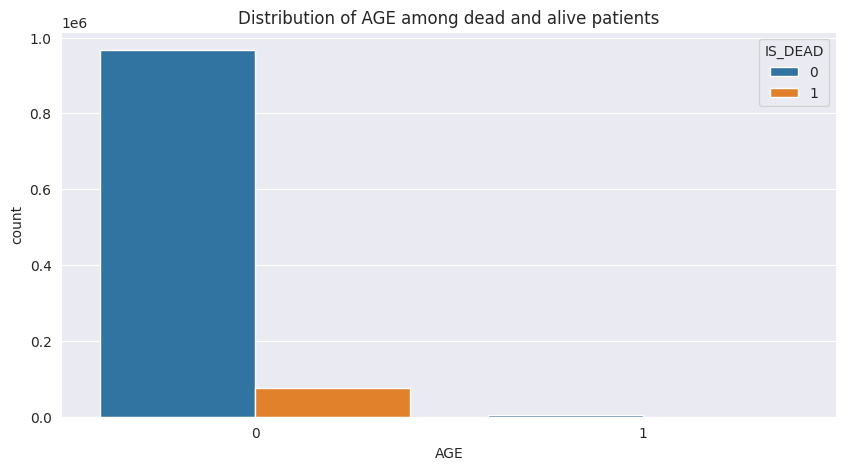

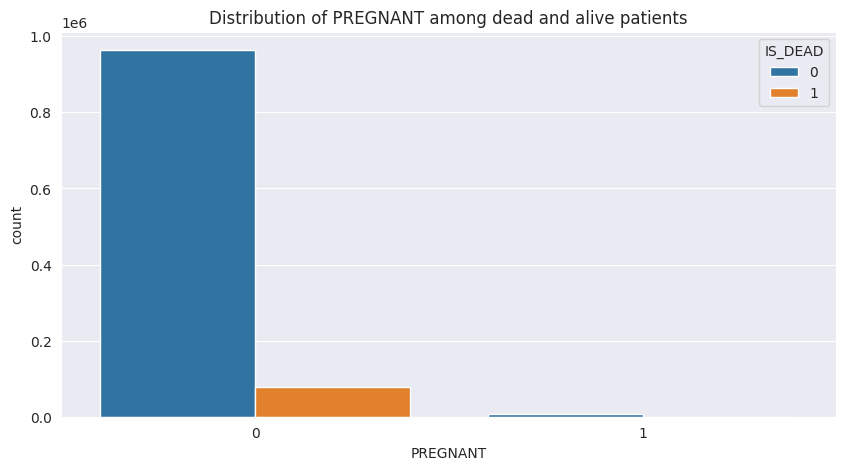

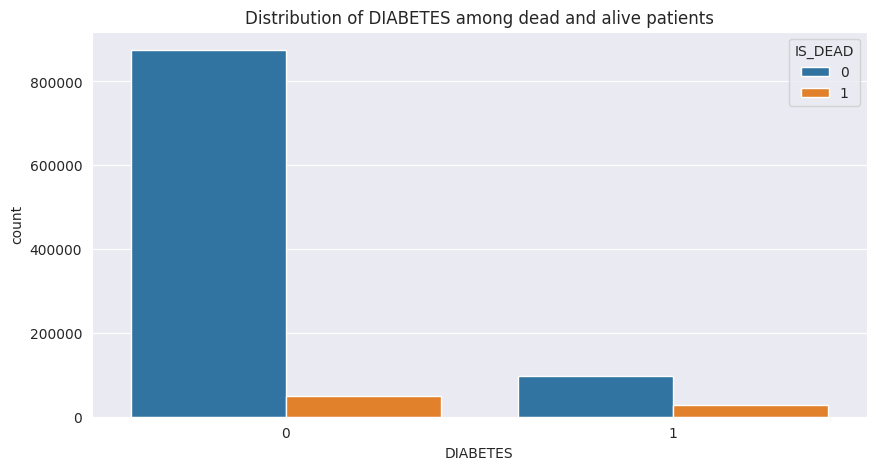

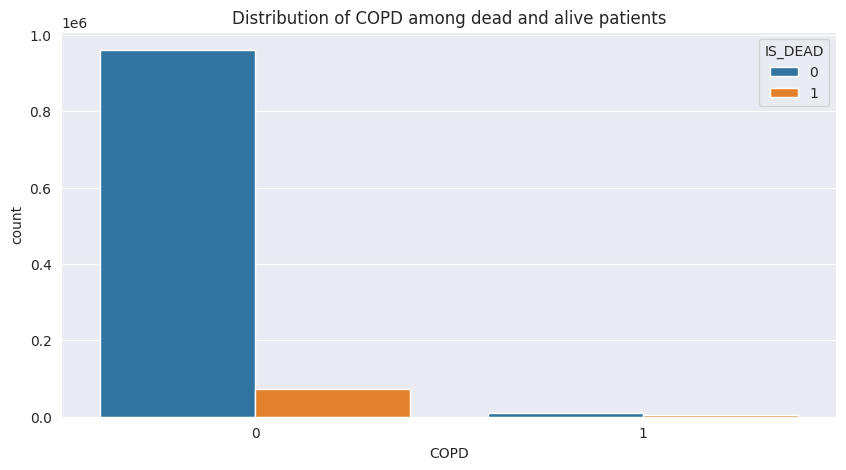

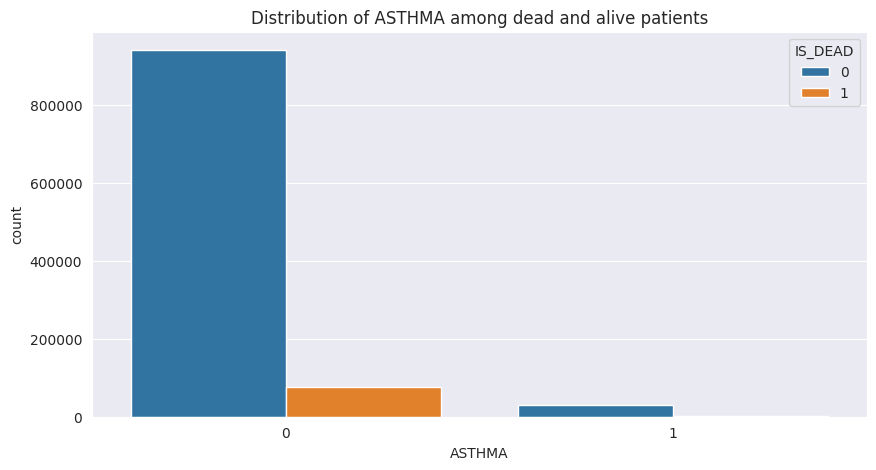

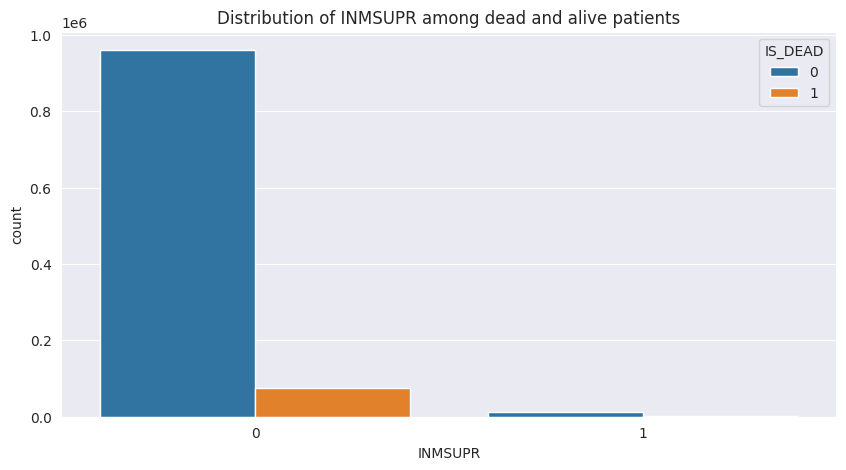

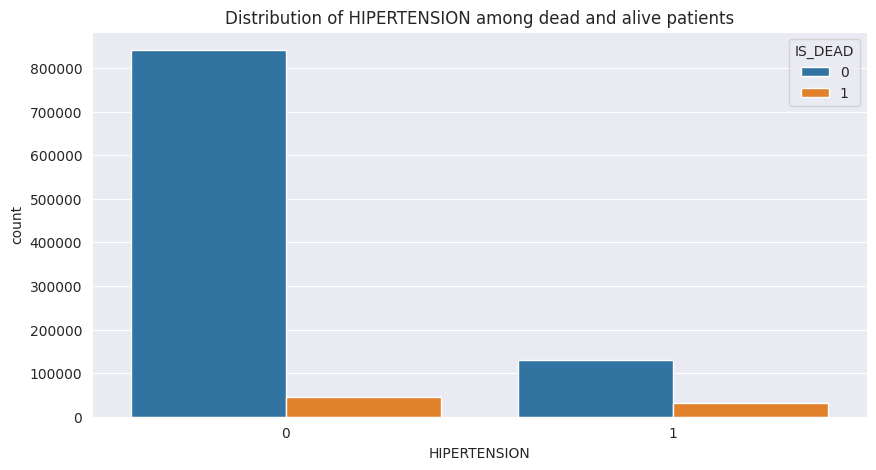

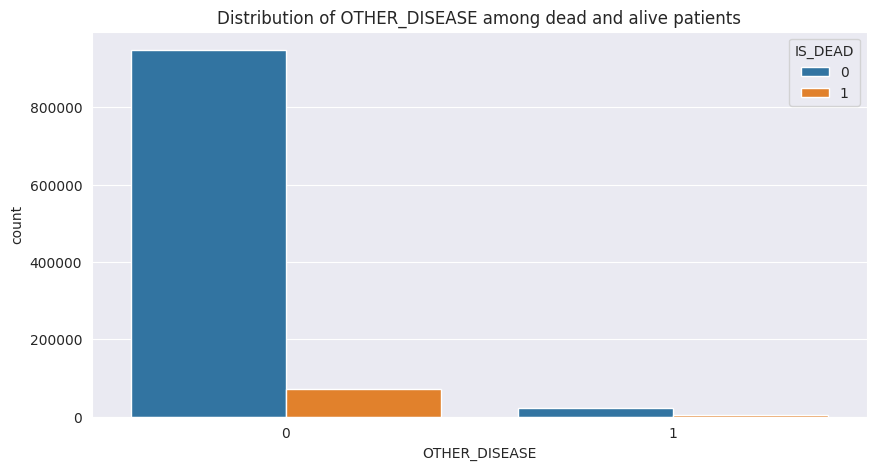

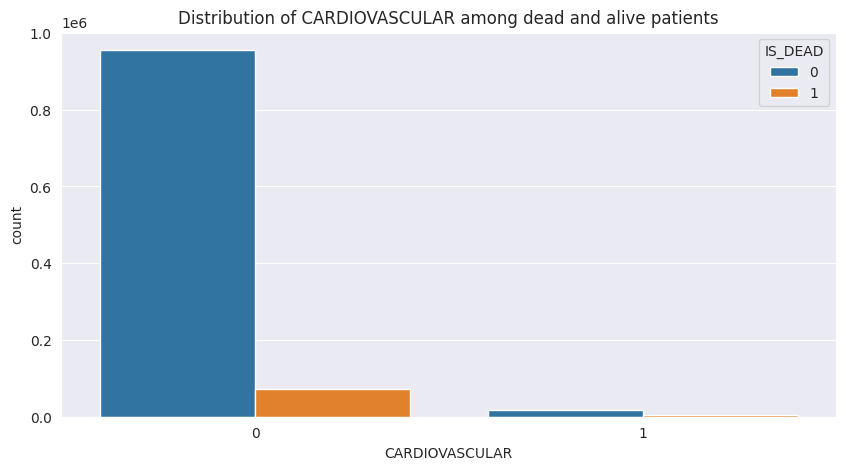

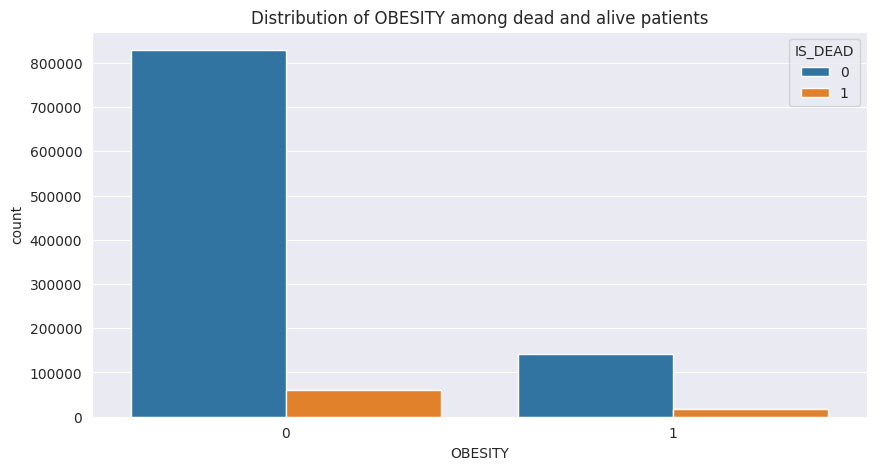

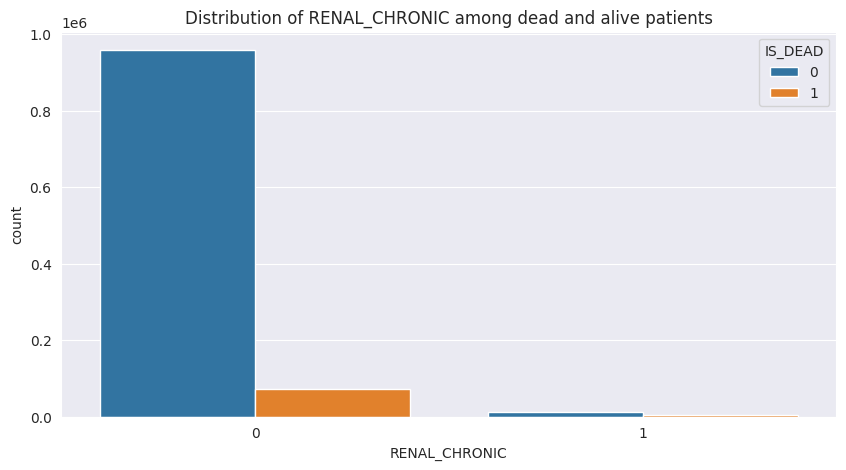

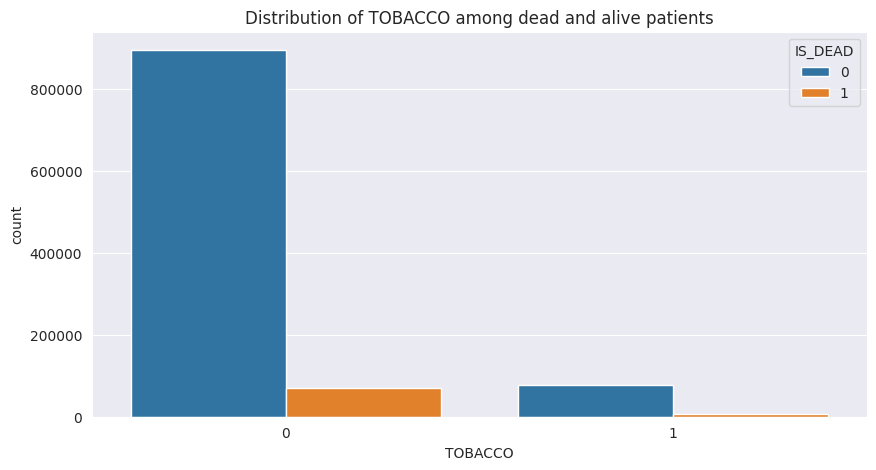

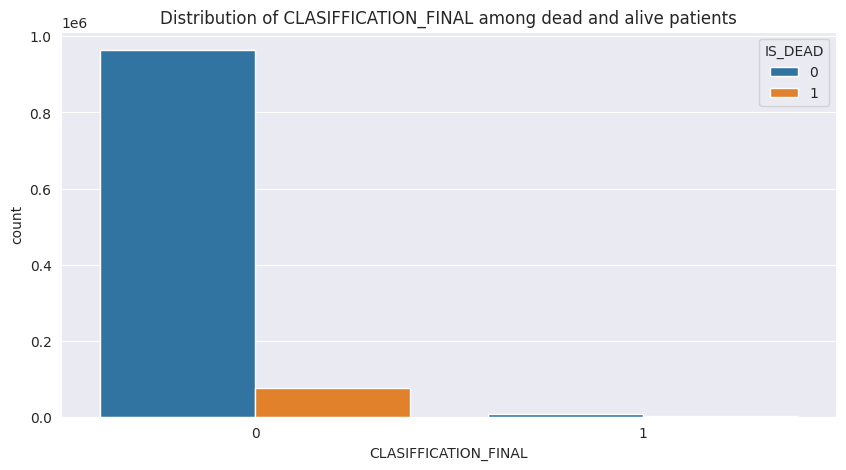

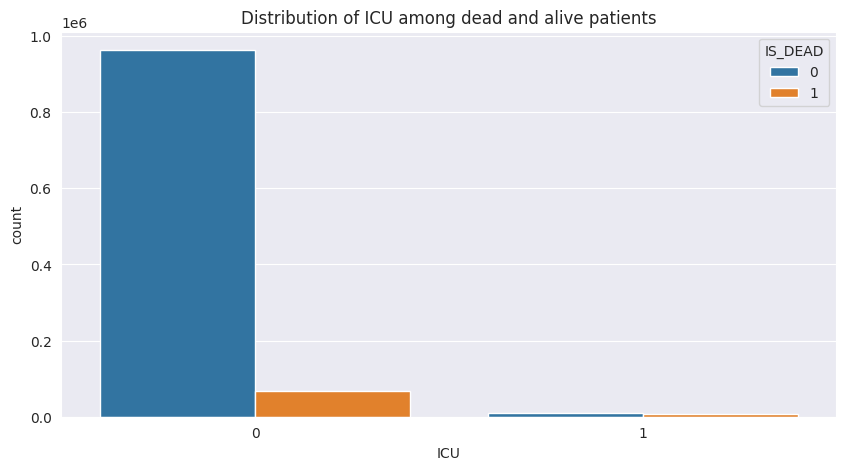

In [54]:
for col in covid.columns:
    if col not in ['DATE_DIED', 'IS_DEAD', 'AGE_GROUP']:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue='IS_DEAD', data=covid)
        plt.title('Distribution of {} among dead and alive patients'.format(col))
        plt.show()


/tmp/ipykernel_152723/2256897307.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = covid.corr()


<AxesSubplot: >

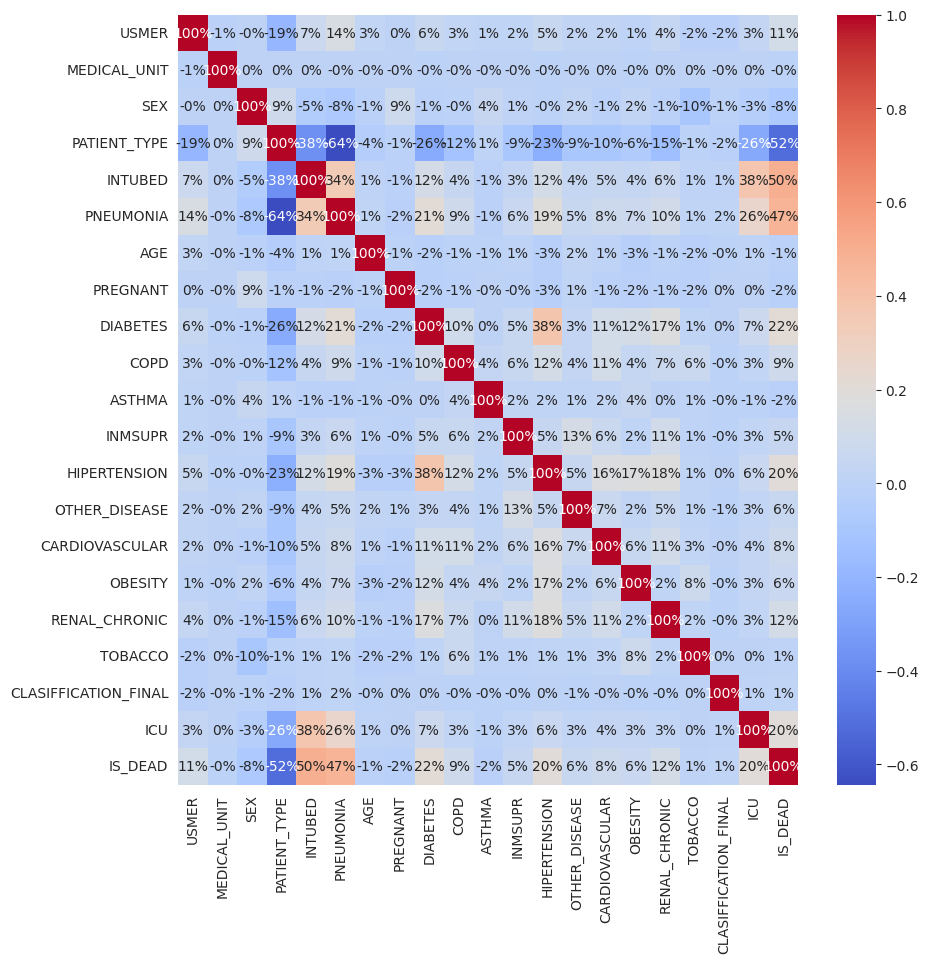

In [59]:
corr = covid.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.0%')


/tmp/ipykernel_152723/1065155218.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = covid.corr()


<AxesSubplot: >

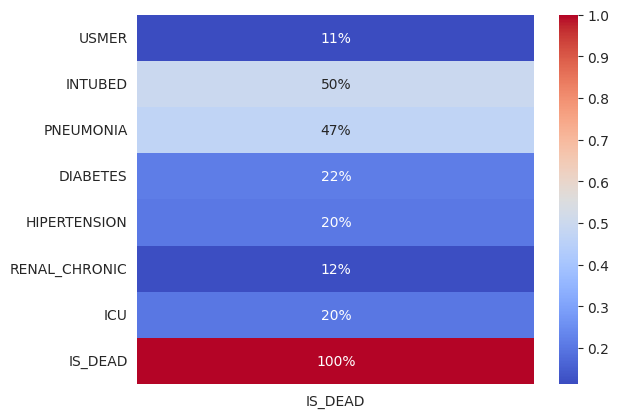

In [66]:
corr = covid.corr()
corr = corr[corr.IS_DEAD > 0.1]
corr = corr[['IS_DEAD']]
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.0%')
